# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
from scrape import *
import ast
all_data = '../prices/prices.csv'
all_data = pd.read_csv(all_data,header = None)
data = all_data.values
import matplotlib
matplotlib.rcParams.update({
                            # Use the Computer modern font
                            'text.usetex': False,
                            'font.family': 'stixgeneral',
                            'mathtext.fontset': 'stix',
                            })

# Figure 1: Example Prices

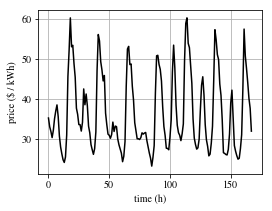

In [46]:
x = data[0][0:168]
t = np.arange(x.shape[0])
fig,ax = plt.subplots(figsize = (4,3))
ax.plot(t,x,'k')
ax.grid(True)
ax.set_ylabel('price ($ / kWh)')
ax.set_xlabel('time (h)')

strFile = "../tex_writing/fig_1.png"
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile,format = 'png',dpi = 600,bbox_inches = 'tight')
plt.show()

# Figure 2: RNN Image (not python)

# Figure 3: Example Price Forecast: Good


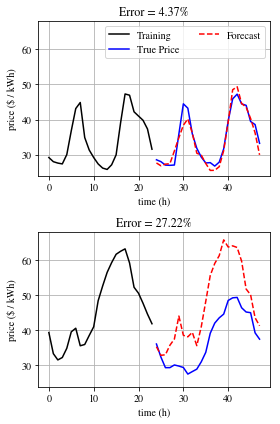

In [54]:
# input price
x = '[29.2248 28.0485 27.6513 27.4129 30.0637 36.8398 43.154  44.875  34.9068\
 31.3683 29.2296 27.3976 26.2272 25.8434 27.157  29.9845 39.1029 47.3007\
 46.951  42.229  41.0189 39.8277 37.3469 31.5879]'
x = x.replace(' ',',').replace(',,',',')
x = ast.literal_eval(x)

# real price
x_real = '[28.5913 28.0507 27.0743 27.0115 27.1 35.9045 44.4933 43.2624 35.9489\
 31.8602 29.3415 27.6834 27.7765 26.7965 27.9152 31.6898 39.6137 45.904\
 47.2476 44.4795 44.0736 39.469  38.6011 33.27  ]'
x_real = x_real.replace(' ',',').replace(',,',',')
x_real = ast.literal_eval(x_real)

# forecast
x_fore = '[27.687551 26.87324  27.351187 27.47263  31.114014 34.864307 38.40956\
 40.201218 36.229465 30.459522 29.91048  27.533363 25.560247 25.595127\
 26.618313 31.219355 39.349434 48.50187  49.35839  44.58301  43.563847\
 40.3265 36.25103 29.993721]'
x_fore = x_fore.replace(' ',',').replace(',,',',')
x_fore = ast.literal_eval(x_fore)
x = np.array(x)
x_real = np.array(x_real)
x_fore = np.array(x_fore)

# time vectors
t = np.arange(x.shape[0])
t_new = np.arange(x_fore.shape[0]) + x.shape[0]

# plotting GOOD
fig = plt.figure(figsize = (4,6))
ax = fig.add_subplot(211)
ax.plot(t,x,'k',label = 'Training')
ax.plot(t_new,x_real,'b',label = 'True Price')
ax.plot(t_new,x_fore,'r--',label = 'Forecast')
ax.grid(True)
ax.legend(ncol=2)
ax.set_ylabel('price ($ / kWh)')
ax.set_xlabel('time (h)')
ax.set_title('Error = 4.37%')
ax.set_ylim(24,68)

# ======================================================== #

# input price
x = '[39.3461 33.3433 31.5611 32.2475 34.8688 39.5477 40.5727 35.5854 35.9517\
 38.511 40.9803 48.4016 52.5857 56.4448 59.2178 61.5957 62.4525 63.1388\
 59.1235 52.2233 50.5198 47.684  44.5853 41.8475]'
x = x.replace(' ',',').replace(',,',',')
x = ast.literal_eval(x)

# real price
x_real = '[36.085  32.3524 29.361  29.3691 30.131  29.8144 29.411  27.5359 28.2519\
 28.9385 31.0324 33.7237 39.1442 42.0226 43.5258 44.588  48.4663 49.219\
 49.3326 46.3883 45.1861 44.9934 39.2649 37.4661]'
x_real = x_real.replace(' ',',').replace(',,',',')
x_real = ast.literal_eval(x_real)

# forecast
x_fore = '[35.320118 32.86539 33.032696 35.737335 37.502853 44.028088 38.56843\
 38.132717 39.40501 35.610905 41.01997 48.22776 55.57484 58.982876\
 61.2007 65.69201 63.658577 63.997063 63.528385 59.63056 51.72493\
 50.074474 43.555176 41.263714]'
x_fore = x_fore.replace(' ',',').replace(',,',',')
x_fore = ast.literal_eval(x_fore)
x = np.array(x)
x_real = np.array(x_real)
x_fore = np.array(x_fore)

# plotting BAD
ax = fig.add_subplot(212)
ax.plot(t,x,'k',label = 'Training')
ax.plot(t_new,x_real,'b',label = 'True Price')
ax.plot(t_new,x_fore,'r--',label = 'Forecast')
ax.grid(True)
# ax.legend(ncol=2)
ax.set_ylabel('price ($ / kWh)')
ax.set_xlabel('time (h)')
ax.set_title('Error = 27.22%')
ax.set_ylim(24,68)

fig.tight_layout()

# saving
strFile = "../tex_writing/fig_3.png"
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile,format = 'png',dpi = 600,bbox_inches = 'tight')
plt.show()

# Figure 5: Histogram of Error for Low Training Data

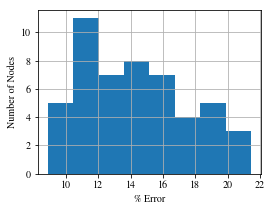

Single Node Median Error: 14.49
Single Node Mean Error: 14.34
Single Node STD 3.13


In [48]:
# scrape data
path = '../implementation/log_clay.txt'
inp_days = 7
locs = 50
results = get_results(path,inp_days,verbose = False)
node_results = np.zeros(locs)
for i in range(inp_days):
    for key, value in results[i].items():
        node_results[key] += value
node_means = node_results / inp_days
        
# plotting
fig,ax = plt.subplots(figsize = (4,3))
ax.hist(node_means,bins = 8)
ax.grid(True)
ax.set_ylabel('Number of Nodes')
ax.set_xlabel('% Error')

# saving
strFile = "../tex_writing/fig_5.png"
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile,format = 'png',dpi = 600,bbox_inches = 'tight')
plt.show()

print('Single Node Median Error: %.2f' % np.median(node_means))
print('Single Node Mean Error: %.2f' % np.mean(node_means))
print('Single Node STD %.2f' % np.std(node_means))

# Figure 6: Histogram of Large Training Data

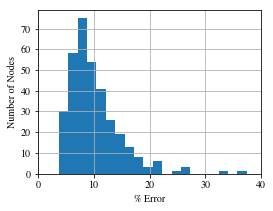

In [49]:
# scrape data
path = '../long_run/single_log.txt'
inp_days = 340
locs = 1
results = get_results(path,inp_days,verbose = False)
node_results = []
for i in range(inp_days):
    for key, value in results[i].items():
        if value < 100:
            node_results.append(value)

# plotting
fig,ax = plt.subplots(figsize = (4,3))
ax.hist(node_results,bins = 20)
ax.set_xlim(0,40)
ax.grid(True)
ax.set_ylabel('Number of Nodes')
ax.set_xlabel('% Error')

# saving
strFile = "../tex_writing/fig_6.png"
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile,format = 'png',dpi = 600,bbox_inches = 'tight')
plt.show()

# Figure 7: Single Node Histogram or Time Series Plot

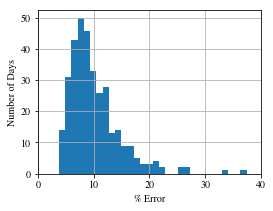

Single Node Median Error: 8.98
Single Node Mean Error: 10.14
Single Node STD 4.59

Quarter 1
Single Node Median Error: 8.39
Single Node Mean Error: 9.60
Single Node STD 4.78

Quarter 2
Single Node Median Error: 9.34
Single Node Mean Error: 9.67
Single Node STD 3.03

Quarter 3
Single Node Median Error: 9.29
Single Node Mean Error: 10.53
Single Node STD 4.67

Quarter 4
Single Node Median Error: 8.80
Single Node Mean Error: 10.74
Single Node STD 5.41



In [50]:
# scrape data
path = '../long_run/single_log.txt'
inp_days = 340
locs = 1
results = get_results(path,inp_days,verbose = False)
node_results = []
for i in range(inp_days):
    for key, value in results[i].items():
        if value < 100:
            node_results.append(value)

# plotting
fig,ax = plt.subplots(figsize = (4,3))
ax.hist(node_results,bins = 30)
ax.set_xlim(0,40)
ax.grid(True)
ax.set_ylabel('Number of Days')
ax.set_xlabel('% Error')

# saving
strFile = "../tex_writing/fig_7.png"
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile,format = 'png',dpi = 600,bbox_inches = 'tight')
plt.show()

print('Single Node Median Error: %.2f' % np.median(node_results))
print('Single Node Mean Error: %.2f' % np.mean(node_results))
print('Single Node STD %.2f' % np.std(node_results))
print()

node_results = list(node_results)

half_1 = node_results[:len(node_results)//2]
one = half_1[:len(half_1)//2]
two = half_1[len(half_1)//2:]
half_2 = node_results[len(node_results)//2:]
three = half_2[:len(half_2)//2]
four = half_2[len(half_2)//2:]

all_q = [one,two,three,four]

for i in range(4):
    print('Quarter',i+1)
    print('Single Node Median Error: %.2f' % np.median(all_q[i]))
    print('Single Node Mean Error: %.2f' % np.mean(all_q[i]))
    print('Single Node STD %.2f' % np.std(all_q[i]))
    print()

# Figure 8: Time series plot of error for a single node

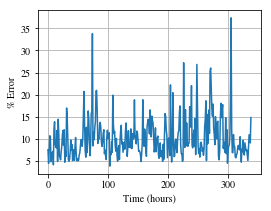

In [2]:
# scrape data
path = '../long_run/single_log.txt'
inp_days = 340
locs = 1
results = get_results(path,inp_days,verbose = False)
node_results = []
for i in range(inp_days):
    for key, value in results[i].items():
        if value < 100:
            node_results.append(value)

# plotting
fig,ax = plt.subplots(figsize = (4,3))
ax.plot(node_results)
# ax.set_xlim(0,40)
ax.grid(True)
ax.set_xlabel('Time (hours)')
ax.set_ylabel('% Error')

# saving
strFile = "../tex_writing/fig_8.png"
if os.path.isfile(strFile):
    os.remove(strFile)
plt.savefig(strFile,format = 'png',dpi = 600,bbox_inches = 'tight')
plt.show()